# LAB12: Speech To Text & Vision



En este cuaderno veremos estos puntos:
- Transcribiremos un audio a texto
- Utilizaremos visión por computadora para intentar describir lo que tenemos en una imagen!


## Speech To Text

Usaremos el modelo de OpenAI, Whisper, para transcribir una conversación.


In [1]:
! pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00


Cargamos el modelo

In [2]:
import whisper

model = whisper.load_model("base")

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 178MiB/s]


In [3]:
!git clone https://github.com/petewarden/openai-whisper-webapp

Cloning into 'openai-whisper-webapp'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 33 (delta 11), reused 30 (delta 9), pack-reused 1 (from 1)
Receiving objects: 100% (33/33), 1.40 MiB | 27.48 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
from IPython.display import Audio

In [5]:
Audio("/content/openai-whisper-webapp/daisy_HAL_9000.mp3")

In [6]:
Audio("/content/openai-whisper-webapp/mary.mp3")

Función de transcripción

In [7]:
def transcribe(audio):

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)
    print(f"Detected language: {max(probs, key=probs.get)}")

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    return result.text

In [8]:
hard_text = transcribe("/content/openai-whisper-webapp/daisy_HAL_9000.mp3")
print(hard_text)

easy_text = transcribe("/content/openai-whisper-webapp/mary.mp3")
print(easy_text)

Detected language: en
Tazy, Tazy, Tazy. Give me your answer to time after crazy all for the love of you. It won't be a stylish marriage
Detected language: en
Mary had a little lamb, its fleece was white as snow, and everywhere that Mary went, the lamb was sure to go.


## Vision

Farem servir el model multimodal de OpenAI GPT-4o.

In [9]:
!pip install "openai>=1"

In [10]:
import cv2
from google.colab.patches import cv2_imshow

--2025-05-20 20:13:12--  https://user-images.githubusercontent.com/5516806/101231459-5515e700-36a3-11eb-9b82-1362a27a3fcc.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125872 (123K) [image/png]
Saving to: ‘101231459-5515e700-36a3-11eb-9b82-1362a27a3fcc.png.1’

101231459-5515e700- 100%[===================>] 122.92K  --.-KB/s    in 0.002s  

2025-05-20 20:13:14 (55.4 MB/s) - ‘101231459-5515e700-36a3-11eb-9b82-1362a27a3fcc.png.1’ saved [125872/125872]



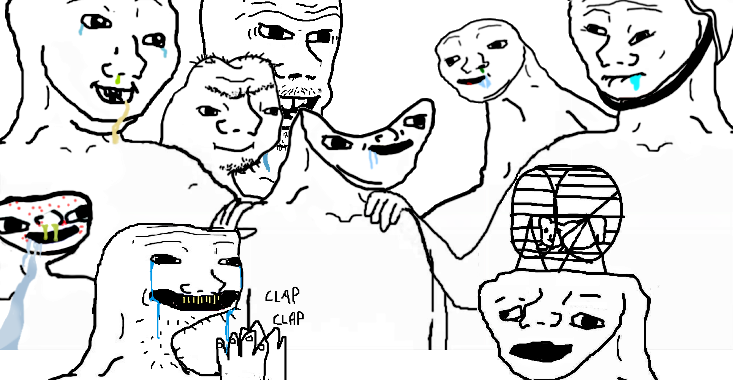

In [21]:
!wget https://user-images.githubusercontent.com/5516806/101231459-5515e700-36a3-11eb-9b82-1362a27a3fcc.png
img = cv2.imread("101231459-5515e700-36a3-11eb-9b82-1362a27a3fcc.png")
cv2_imshow(img)

In [12]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

OpenAI API Key:··········


In [22]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://user-images.githubusercontent.com/5516806/101231459-5515e700-36a3-11eb-9b82-1362a27a3fcc.png",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [23]:
out = response.choices[0].message.content
print(out)

The image is a digitally drawn meme featuring a group of "NPC" (Non-Playable Character) characters, known for their simplistic and expressionless faces. Some are drooling, with tears and various facial expressions. One is clapping, and another has a hamster wheel on its head with a hamster inside. This type of meme is often used to depict people as lacking individual thoughts or blindly following trends.


--2025-05-20 20:14:39--  https://media-cdn.tripadvisor.com/media/photo-s/0e/8d/7a/4e/carta-de-sushi.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 13.33.88.46, 13.33.88.42, 13.33.88.2, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|13.33.88.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33074 (32K) [image/jpeg]
Saving to: ‘carta-de-sushi.jpg’

carta-de-sushi.jpg  100%[===================>]  32.30K  --.-KB/s    in 0.001s  

2025-05-20 20:14:40 (21.7 MB/s) - ‘carta-de-sushi.jpg’ saved [33074/33074]



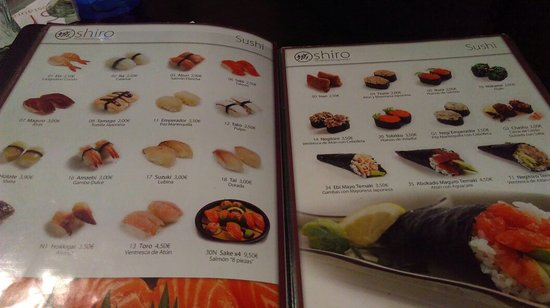

In [24]:
!wget https://media-cdn.tripadvisor.com/media/photo-s/0e/8d/7a/4e/carta-de-sushi.jpg
img = cv2.imread("carta-de-sushi.jpg")
cv2_imshow(img)

In [28]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Te voy a pasar una imagen de una carta de un restaurante y me tienes que decir la opción más saludable de comer. Solo una y que aparezca en la carta, no te la inventes. Response siempre en Español. Si la  imagen esta muy borrosa dinos que no ves nada"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://media-cdn.tripadvisor.com/media/photo-s/0e/8d/7a/4e/carta-de-sushi.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [29]:
out = response.choices[0].message.content
print(out)

En la carta, la opción más saludable podría ser el "10N Sake" (salmón) sashimi, ya que el sashimi se compone principalmente de pescado fresco sin arroz ni salsas añadidas.


# Text to Speach

In [30]:
from pathlib import Path
from openai import OpenAI
client = OpenAI()

speech_file_path = "speech.mp3"
response = client.audio.speech.create(
  model="tts-1",
  voice="onyx",
  input="La opción más saludable de comer que aparece en la carta es 'Ensalada Verde' del apartado VARIOS."
)

response.stream_to_file(speech_file_path)

<ipython-input-30-d09939693d27>:12: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)
